# TP Integrador N° 1 
#### Grupo 10

Integrantes:
- Rodrigo Gramajo
- Facundo Peloso
- Guido Perez 
- Roberto Biancardi
- Nicolás Baraneck

In [1]:
#Importacion de librerias/módulos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Establezco la dirección del archivo
file_location='properatti.csv'

#Leo el data set
datos_crudos=pd.read_csv(file_location)

#Visualizo las primeras filas
display(datos_crudos.head(3))



,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...


In [3]:
#Visualizco la dimensión del Dataset
print('Tamaño del dataset')
print('Filas:',datos_crudos.shape[0])
print('Columnas:',datos_crudos.shape[1])

Tamaño del dataset
Filas: 121220
Columnas: 26


In [4]:
#Columnas del dataset

listado_de_columnas=datos_crudos.columns

for i in listado_de_columnas : 
    print(i)

Unnamed: 0
operation
property_type
place_name
place_with_parent_names
country_name
state_name
geonames_id
lat-lon
lat
lon
price
currency
price_aprox_local_currency
price_aprox_usd
surface_total_in_m2
surface_covered_in_m2
price_usd_per_m2
price_per_m2
floor
rooms
expenses
properati_url
description
title
image_thumbnail


### Analisis cualitativa de las columnas / cuales son de interes

(aca describir porque sacamos las que no sirven)

In [9]:
#Creo una serie donde guardo el porcentaje de nulos en cada columna
porcentaje_nulos_columnas=100*datos_crudos.isna().sum()/datos_crudos.shape[0]

#Visualizo la serie
display(porcentaje_nulos_columnas)

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


(array([11.,  6.,  1.,  1.,  4.,  0.,  1.,  0.,  0.,  2.]),
 array([ 0.        ,  9.34837486, 18.69674971, 28.04512457, 37.39349942,
        46.74187428, 56.09024913, 65.43862399, 74.78699885, 84.1353737 ,
        93.48374856]),
 <BarContainer object of 10 artists>)

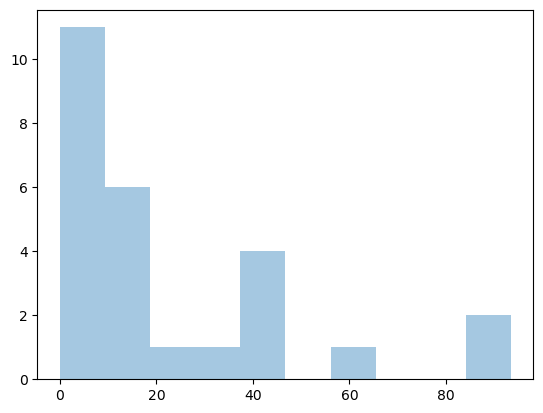

In [10]:
#Visualizamos porcentajes de nulos por columna en un histo

#creo una figura
fig = plt.figure()
# creo los axes
ax = plt.axes()
# dibujo en axes:
ax.hist(porcentaje_nulos_columnas, label='Porcentaje de Nulos por Columna', alpha = 0.4)

In [11]:
#with sns.axes_style('white'):
 #   g = sns.catplot(x = porcentaje_nulos_columnas.index, data=porcentaje_nulos_columnas.values, aspect=2, kind="count", color='steelblue')
  #  g.set_xticklabels(step=5)

'''
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(5)
width = 0.35

fig = plt.figure(figsize=(6,2)); ax = plt.axes()
ax.bar(ind, menMeans, width, color='r') # barra roja. 
ax.bar(ind, womenMeans, width, color='b', bottom=menMeans) # barra azul 

ax.set_ylabel('Scores'); ax.set_title('Scores by group and gender')
ax.set_xticks(ind); ax.set_xticklabels(['G1', 'G2', 'G3', 'G4', 'G5'])
ax.legend(labels=['Men', 'Women'])
plt.show()
'''

"\nmenMeans = (20, 35, 30, 35, 27)\nwomenMeans = (25, 32, 34, 20, 25)\nind = np.arange(5)\nwidth = 0.35\n\nfig = plt.figure(figsize=(6,2)); ax = plt.axes()\nax.bar(ind, menMeans, width, color='r') # barra roja. \nax.bar(ind, womenMeans, width, color='b', bottom=menMeans) # barra azul \n\nax.set_ylabel('Scores'); ax.set_title('Scores by group and gender')\nax.set_xticks(ind); ax.set_xticklabels(['G1', 'G2', 'G3', 'G4', 'G5'])\nax.legend(labels=['Men', 'Women'])\nplt.show()\n"